# Section 3 - Kung Fu Panda(s)

![Quote from KFP](images/quote3.PNG)

- groupby
- df.apply(function)
- read_csv()

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
t = pd.read_csv('data/train.csv')

In [3]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


![Groupby functions](images/groupby.png)

In [4]:
s = t[['Name','Sex']]

In [5]:
s

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
5,"Moran, Mr. James",male
6,"McCarthy, Mr. Timothy J",male
7,"Palsson, Master. Gosta Leonard",male
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female
9,"Nasser, Mrs. Nicholas (Adele Achem)",female


In [6]:
s.groupby('Sex')

### What is the groupby() type?

In [7]:
type(s.groupby('Sex'))

pandas.core.groupby.DataFrameGroupBy

In [8]:
### Show the keys and dataframe objects as shown in the figure above

In [9]:
for key,dataf in s.groupby('Sex'):
    print(key)
    print(dataf)

female
                                                  Name     Sex
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female
2                               Heikkinen, Miss. Laina  female
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female
9                  Nasser, Mrs. Nicholas (Adele Achem)  female
10                     Sandstrom, Miss. Marguerite Rut  female
11                            Bonnell, Miss. Elizabeth  female
14                Vestrom, Miss. Hulda Amanda Adolfina  female
15                    Hewlett, Mrs. (Mary D Kingcome)   female
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female
19                             Masselmani, Mrs. Fatima  female
22                         McGowan, Miss. Anna "Annie"  female
24                       Palsson, Miss. Torborg Danira  female
25   Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female
28                       O'Dwyer, Miss. Ellen "N

In [10]:
type(dataf)

pandas.core.frame.DataFrame

In [11]:
s.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

## Apply

### Children are defined as under 18 years of age. Plot the survivors - male, female and children

In [12]:
def is_child(pass_info):
    sex,age = pass_info
    if(age < 18):
        return 'child'
    else:
        return sex

In [13]:
t[['Sex','Age']];

In [14]:
t[['Sex','Age']].apply(is_child,axis=1); #axis = 1 is columns

In [36]:
type(t)

pandas.core.frame.DataFrame

In [29]:
t['PassengerType'] = t[['Sex','Age']].apply(is_child,axis=1)

In [25]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


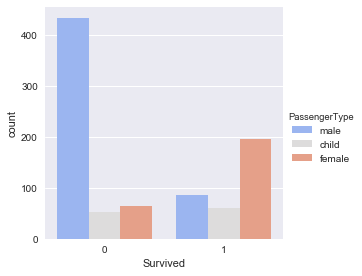

In [37]:
sns.factorplot(x='Survived',data=t,hue='PassengerType',kind='count',palette='coolwarm',hue_order=['male','child','female'])

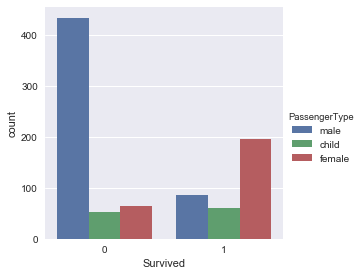

In [39]:
sns.factorplot(x='Survived', data=t, kind='count', hue='PassengerType',hue_order=['male','child','female'])

### Children are defined as under 18 years of age. Plot, using a bar graph, the passengers (male,female,children) for each class

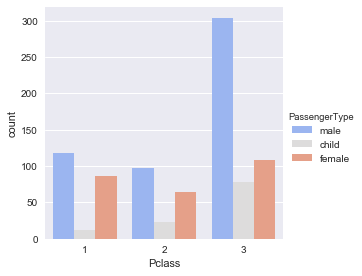

In [41]:
sns.factorplot(x='Pclass',kind='count',data=t,hue='PassengerType',palette='coolwarm',hue_order=['male','child','female'])

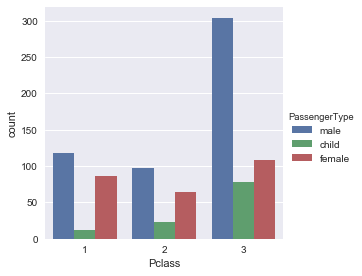

In [40]:
sns.factorplot(x='Pclass', data=t, kind='count', hue='PassengerType',hue_order=['male','child','female'])

### Inflation

In [46]:
t.Fare.apply(lambda x : 106*x)

0        768.5000
1       7556.0298
2        840.0500
3       5628.6000
4        853.3000
5        896.5798
6       5497.4250
7       2233.9500
8       1180.1298
9       3187.5048
10      1770.2000
11      2814.3000
12       853.3000
13      3315.1500
14       832.5452
15      1696.0000
16      3087.2500
17      1378.0000
18      1908.0000
19       765.8500
20      2756.0000
21      1378.0000
22       851.0952
23      3763.0000
24      2233.9500
25      3327.0750
26       765.8500
27     27878.0000
28       835.1952
29       836.9548
          ...    
861     1219.0000
862     2748.4952
863     7372.3000
864     1378.0000
865     1378.0000
866     1468.9798
867     5352.5548
868     1007.0000
869     1180.1298
870      836.9548
871     5570.7452
872      530.0000
873      954.0000
874     2544.0000
875      765.8500
876     1043.6548
877      836.9548
878      836.9548
879     8814.7798
880     2756.0000
881      836.9548
882     1114.7702
883     1113.0000
884      747.3000
885     30

## pd.read_csv(...)

### encoding=, index_col= , skiprows=, parse_dates=True,index_col='Date/Time'

In [60]:
time = pd.read_csv('data/Mar-2017.csv'); #this won't work. Whereas this will...

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 0: invalid start byte

In [73]:
time = pd.read_csv('data/Mar-2017.csv',encoding='latin1')

In [74]:
time.head(20)

,Station Name,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Province,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Elevation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Climate Identifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,WMO Identifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,TC Identifier,XTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,All times are specified in Local Standard Time...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Legend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
time = pd.read_csv('data/Mar-2017.csv',encoding='latin1',skiprows=16) #skip first 16 rows

In [81]:
time.head(20)

,Date/Time,Year,Month,Day,Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,01/03/2017 00:00,2017,3,1,00:00,,10.6,NaN,7.1,NaN,...,M,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN
1,01/03/2017 01:00,2017,3,1,01:00,,9.8,NaN,8.5,NaN,...,M,NaN,NaN,99.05,NaN,NaN,NaN,NaN,NaN,NaN
2,01/03/2017 02:00,2017,3,1,02:00,,9.9,NaN,9.0,NaN,...,M,NaN,NaN,98.83,NaN,NaN,NaN,NaN,NaN,NaN
3,01/03/2017 03:00,2017,3,1,03:00,,9.8,NaN,8.9,NaN,...,M,NaN,NaN,98.61,NaN,NaN,NaN,NaN,NaN,NaN
4,01/03/2017 04:00,2017,3,1,04:00,,9.3,NaN,8.5,NaN,...,M,NaN,NaN,98.40,NaN,NaN,NaN,NaN,NaN,NaN
5,01/03/2017 05:00,2017,3,1,05:00,,10.6,NaN,9.8,NaN,...,M,NaN,NaN,98.35,NaN,NaN,NaN,NaN,NaN,NaN
6,01/03/2017 06:00,2017,3,1,06:00,,11.3,NaN,10.4,NaN,...,M,NaN,NaN,98.25,NaN,NaN,NaN,NaN,NaN,NaN
7,01/03/2017 07:00,2017,3,1,07:00,,11.1,NaN,10.2,NaN,...,M,NaN,NaN,98.21,NaN,NaN,NaN,NaN,NaN,NaN
8,01/03/2017 08:00,2017,3,1,08:00,,10.4,NaN,9.3,NaN,...,M,NaN,NaN,98.03,NaN,NaN,NaN,NaN,NaN,NaN
9,01/03/2017 09:00,2017,3,1,09:00,,10.5,NaN,9.4,NaN,...,M,NaN,NaN,98.12,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
time.head()

,Date/Time,Year,Month,Day,Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,01/03/2017 00:00,2017,3,1,00:00,,10.6,NaN,7.1,NaN,...,M,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN
1,01/03/2017 01:00,2017,3,1,01:00,,9.8,NaN,8.5,NaN,...,M,NaN,NaN,99.05,NaN,NaN,NaN,NaN,NaN,NaN
2,01/03/2017 02:00,2017,3,1,02:00,,9.9,NaN,9.0,NaN,...,M,NaN,NaN,98.83,NaN,NaN,NaN,NaN,NaN,NaN
3,01/03/2017 03:00,2017,3,1,03:00,,9.8,NaN,8.9,NaN,...,M,NaN,NaN,98.61,NaN,NaN,NaN,NaN,NaN,NaN
4,01/03/2017 04:00,2017,3,1,04:00,,9.3,NaN,8.5,NaN,...,M,NaN,NaN,98.40,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
time = pd.read_csv('data/Mar-2017.csv',encoding='latin1',skiprows=16,index_col='Date/Time') #index using 'Date/Time' header

In [124]:
time.head() 

,Year,Month,Day,Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
01/03/2017 00:00,2017,3,1,00:00,,10.6,NaN,7.1,NaN,79.0,...,M,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN
01/03/2017 01:00,2017,3,1,01:00,,9.8,NaN,8.5,NaN,92.0,...,M,NaN,NaN,99.05,NaN,NaN,NaN,NaN,NaN,NaN
01/03/2017 02:00,2017,3,1,02:00,,9.9,NaN,9.0,NaN,94.0,...,M,NaN,NaN,98.83,NaN,NaN,NaN,NaN,NaN,NaN
01/03/2017 03:00,2017,3,1,03:00,,9.8,NaN,8.9,NaN,94.0,...,M,NaN,NaN,98.61,NaN,NaN,NaN,NaN,NaN,NaN
01/03/2017 04:00,2017,3,1,04:00,,9.3,NaN,8.5,NaN,95.0,...,M,NaN,NaN,98.40,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
time = pd.read_csv('data/Mar-2017.csv',encoding='latin1',skiprows=16,parse_dates=True,index_col='Date/Time',dayfirst=True) 
# this is the same as the above but it also trys passing dates including the dayfirst format

In [154]:
#file is encoded in latin1, skiped first 16 rows of file
#parse_dates=True if True -> try parsing the index
#index_col='Date/Time' is used to label the rows of the 
#dayfirst=True means DD/MM format dates, international and European format

In [155]:
time.head()

,Year,Month,Day,Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2017-03-01 00:00:00,2017,3,1,00:00,,10.6,NaN,7.1,NaN,79.0,...,M,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-01 01:00:00,2017,3,1,01:00,,9.8,NaN,8.5,NaN,92.0,...,M,NaN,NaN,99.05,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-01 02:00:00,2017,3,1,02:00,,9.9,NaN,9.0,NaN,94.0,...,M,NaN,NaN,98.83,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-01 03:00:00,2017,3,1,03:00,,9.8,NaN,8.9,NaN,94.0,...,M,NaN,NaN,98.61,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-01 04:00:00,2017,3,1,04:00,,9.3,NaN,8.5,NaN,95.0,...,M,NaN,NaN,98.40,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
#reset the index
time.reset_index(inplace=True)#reset the index to be what it was originally, not 'Date/Time', above, and do replace time df with this

In [157]:
time.head()

,Date/Time,Year,Month,Day,Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2017-03-01 00:00:00,2017,3,1,00:00,,10.6,NaN,7.1,NaN,...,M,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-03-01 01:00:00,2017,3,1,01:00,,9.8,NaN,8.5,NaN,...,M,NaN,NaN,99.05,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-03-01 02:00:00,2017,3,1,02:00,,9.9,NaN,9.0,NaN,...,M,NaN,NaN,98.83,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-03-01 03:00:00,2017,3,1,03:00,,9.8,NaN,8.9,NaN,...,M,NaN,NaN,98.61,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-03-01 04:00:00,2017,3,1,04:00,,9.3,NaN,8.5,NaN,...,M,NaN,NaN,98.40,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
time.drop('Date/Time',axis=1,inplace=True) #drop the col (axis=1) 'Date/Time' and replace the old df time with this one

In [159]:
time.head()

,Year,Month,Day,Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2017,3,1,00:00,,10.6,NaN,7.1,NaN,79.0,...,M,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,3,1,01:00,,9.8,NaN,8.5,NaN,92.0,...,M,NaN,NaN,99.05,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,3,1,02:00,,9.9,NaN,9.0,NaN,94.0,...,M,NaN,NaN,98.83,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,3,1,03:00,,9.8,NaN,8.9,NaN,94.0,...,M,NaN,NaN,98.61,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,3,1,04:00,,9.3,NaN,8.5,NaN,95.0,...,M,NaN,NaN,98.40,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
# write to a csv file
time.to_csv('data/Mar-2017-no-date.csv')

In [162]:
dt = pd.read_csv('data/Mar-2017-no-date.csv') #this won't work because we need to specify the encoding

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 6: invalid start byte

In [163]:
# this will work because we've specified the encoding =latin1
# read from the csv file (rememeber that we don't need to skip the first 16 rows as we dealt with this earlier)
dt = pd.read_csv('data/Mar-2017-no-date.csv',encoding='latin1')

In [170]:
dt = pd.read_csv('data/Mar-2017-no-date.csv',encoding='latin1')

In [171]:
dt.head()

,Unnamed: 0,Year,Month,Day,Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,0,2017,3,1,00:00,,10.6,NaN,7.1,NaN,...,M,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2017,3,1,01:00,,9.8,NaN,8.5,NaN,...,M,NaN,NaN,99.05,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2017,3,1,02:00,,9.9,NaN,9.0,NaN,...,M,NaN,NaN,98.83,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2017,3,1,03:00,,9.8,NaN,8.9,NaN,...,M,NaN,NaN,98.61,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2017,3,1,04:00,,9.3,NaN,8.5,NaN,...,M,NaN,NaN,98.40,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
### we parse_dates
###list of ints or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3 each 
#as a separate date column.
###list of lists. e.g. If [[1, 3]] -> combine columns 1 and 3 and parse as a 
#single date column.
dt = pd.read_csv('data/Mar-2017-no-date.csv',encoding='latin1',parse_dates=[[1,2,3]])

In [173]:
dt.head()

,Year_Month_Day,Unnamed: 0,Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2017-03-01,0,00:00,,10.6,NaN,7.1,NaN,79.0,NaN,...,M,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-03-01,1,01:00,,9.8,NaN,8.5,NaN,92.0,NaN,...,M,NaN,NaN,99.05,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-03-01,2,02:00,,9.9,NaN,9.0,NaN,94.0,NaN,...,M,NaN,NaN,98.83,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-03-01,3,03:00,,9.8,NaN,8.9,NaN,94.0,NaN,...,M,NaN,NaN,98.61,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-03-01,4,04:00,,9.3,NaN,8.5,NaN,95.0,NaN,...,M,NaN,NaN,98.40,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
dt.columns

Index(['Year_Month_Day', 'Unnamed: 0', 'Time', 'Data Quality', 'Temp (°C)',
       'Temp Flag', 'Dew Point Temp (°C)', 'Dew Point Temp Flag',
       'Rel Hum (%)', 'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag',
       'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)',
       'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx',
       'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather'],
      dtype='object')

In [175]:
dt.drop(labels='Unnamed: 0',inplace=True,axis=1)#drop the Unnamed col (axis=1) and replace dt with this new dataframe

In [176]:
dt.head()

,Year_Month_Day,Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2017-03-01,00:00,,10.6,NaN,7.1,NaN,79.0,NaN,NaN,...,M,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-03-01,01:00,,9.8,NaN,8.5,NaN,92.0,NaN,NaN,...,M,NaN,NaN,99.05,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-03-01,02:00,,9.9,NaN,9.0,NaN,94.0,NaN,NaN,...,M,NaN,NaN,98.83,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-03-01,03:00,,9.8,NaN,8.9,NaN,94.0,NaN,NaN,...,M,NaN,NaN,98.61,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-03-01,04:00,,9.3,NaN,8.5,NaN,95.0,NaN,NaN,...,M,NaN,NaN,98.40,NaN,NaN,NaN,NaN,NaN,NaN


### converters=

In [190]:
mac = pd.read_csv('data/MAC-address.csv')

In [191]:
mac.head()

,Serial Number,MAC address
0,FTX1010W33C,28-F1-0E-2A-6D-C0
1,FTX1143W087,28-F1-0E-2A-71-A1
2,FTX1027W0EZ,28-F1-0E-2A-71-A2
3,FTX1036W07P,28-F1-0E-2A-71-A3
4,FTX1027W0D9,28-F1-0E-2A-71-A4


In [192]:
mac.columns

Index(['Serial Number', 'MAC address'], dtype='object')

In [193]:
mac = pd.read_csv('data/MAC-address.csv',converters={'MAC address' : lambda x : x[-8:]}) 
#converters allows you to convert the values in the 'MAC address' column to lambda x where lambda x is
# x[-8:] which is x with minus the first 8 characters and the rest of the characters listed, via ':'

In [194]:
mac.columns = ['Serial Number','Network Interface Controller']
#change column headings to 'Serial Number' and'Network Interface Controller'

In [195]:
mac

,Serial Number,Network Interface Controller
0,FTX1010W33C,2A-6D-C0
1,FTX1143W087,2A-71-A1
2,FTX1027W0EZ,2A-71-A2
3,FTX1036W07P,2A-71-A3
4,FTX1027W0D9,2A-71-A4
5,FTX1009Y0Y2,2A-71-A5
6,FTX1042W0CT,2A-71-A6
7,FTX1010W32M,2A-71-A7
8,FTX153902V1,2B-71-A8
9,FTX1233A65L,2B-71-A9
